<a href="https://colab.research.google.com/github/alathiya/Bike-Sharing-Pattern/blob/main/project_template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

1. Open account settings.
![kaggle1.png](attachment:kaggle1.png)
![kaggle2.png](attachment:kaggle2.png)
2. Scroll down to API and click Create New API Token.
![kaggle3.png](attachment:kaggle3.png)
![kaggle4.png](attachment:kaggle4.png)
3. Open up `kaggle.json` and use the username and key.
![kaggle5.png](attachment:kaggle5.png)

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [1]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir
# Without --no-cache-dir, smaller aws instances may have trouble installing

     |████████████████████████████████| 819 kB 29.6 MB/s 
  Attempting uninstall: setuptools
    Found existing installation: setuptools 57.2.0
    Uninstalling setuptools-57.2.0:
      Successfully uninstalled setuptools-57.2.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


     |████████████████████████████████| 46.9 MB 42 kB/s 
     |████████████████████████████████| 8.6 MB 32.7 MB/s 
  Created wheel for bokeh: filename=bokeh-2.0.1-py3-none-any.whl size=9080040 sha256=48556000fb550ad86e3d9f5fd03628698e3829d2ca6a575a70d433dd5b075c06
  Stored in directory: /root/.cache/pip/wheels/9f/9e/ac/f24f30e119df73511fde9af8aa747217ac8824e662037ba9a8
Successfully built bokeh
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1
  Attempting uninstall: bokeh
    Found existing installation: bokeh 2.3.3
    Uninstalling bokeh-2.3.3:
      Successfully uninstalled bokeh-2.3.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
panel 0.11.3 requires bokeh<2.4.0,>=2.3.0, but you have bokeh 2.0.1 which is incompatible.
     |████████████████████

### Setup Kaggle API Key

In [ ]:
# create the .kaggle directory and an empty kaggle.json file
!mkdir -p /root/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
# Fill in your user name and key from creating the kaggle account and API token file
import json
kaggle_username = "alathiya"
kaggle_key = "ed7e146cbc308a331148fd61456d6883"

# Save API token the kaggle.json file
with open("/root/.kaggle/kaggle.json", "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

### Download and explore dataset

### Go to the bike sharing demand competition and agree to the terms
![kaggle6.png](attachment:kaggle6.png)

In [ ]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip

test.csv: Skipping, found more recently modified local copy (use --force to force download)
train.csv: Skipping, found more recently modified local copy (use --force to force download)
sampleSubmission.csv: Skipping, found more recently modified local copy (use --force to force download)
unzip:  cannot find or open bike-sharing-demand.zip, bike-sharing-demand.zip.zip or bike-sharing-demand.zip.ZIP.


In [1]:
import pandas as pd
from autogluon.tabular import TabularPredictor

In [ ]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv('train.csv', parse_dates = ['datetime'])
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [ ]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv('test.csv', parse_dates = ['datetime'])
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [ ]:
# Same thing as train and test dataset
submission = pd.read_csv('sampleSubmission.csv', parse_dates = ['datetime'])
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


## Step 3: Train a model using AutoGluon’s Tabular Prediction

In [ ]:
eval_metric = 'root_mean_squared_error' 
X_train = train.drop(['casual','registered'], axis = 1)
y_train = train['count']

Requirements:
* We are prediting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset. 
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [ ]:
predictor = TabularPredictor(label='count', eval_metric=eval_metric).fit(X_train, presets='best_quality', time_limit=600)

No path specified. Models will be saved in: "AutogluonModels/ag-20210719_223536/"
Presets specified: ['best_quality']
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20210719_223536/"
AutoGluon Version:  0.2.0
Train Data Rows:    10886
Train Data Columns: 9
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
NumExpr defaulting to 2 threads.
	Available Memory:                    12688.12 MB
	Train Data (Original)  Memory Usage: 0.78 MB (0.0% of available memory)
	Inferring data type 

[1000]	train_set's rmse: 123.806	valid_set's rmse: 134.369
[2000]	train_set's rmse: 117.412	valid_set's rmse: 133.705
[1000]	train_set's rmse: 123.42	valid_set's rmse: 141.5
[1000]	train_set's rmse: 125.097	valid_set's rmse: 128.797
[2000]	train_set's rmse: 119.003	valid_set's rmse: 127.909
[3000]	train_set's rmse: 114.63	valid_set's rmse: 127.431
[4000]	train_set's rmse: 111.295	valid_set's rmse: 126.943
[5000]	train_set's rmse: 108.576	valid_set's rmse: 126.844
[6000]	train_set's rmse: 106.085	valid_set's rmse: 126.71
[1000]	train_set's rmse: 124.131	valid_set's rmse: 138.303
[2000]	train_set's rmse: 117.833	valid_set's rmse: 137.535
[1000]	train_set's rmse: 124.871	valid_set's rmse: 128.052
[2000]	train_set's rmse: 118.547	valid_set's rmse: 127.003
[3000]	train_set's rmse: 114.124	valid_set's rmse: 126.834
[4000]	train_set's rmse: 110.645	valid_set's rmse: 126.694
[1000]	train_set's rmse: 124.654	valid_set's rmse: 135.095
[2000]	train_set's rmse: 118.764	valid_set's rmse: 133.849
[3

	-134.0883	 = Validation root_mean_squared_error score
	36.6s	 = Training runtime
	2.22s	 = Validation runtime
Fitting model: LightGBM_BAG_L1 ... Training model for up to 355.77s of the 555.82s of remaining time.


[1000]	train_set's rmse: 96.0217	valid_set's rmse: 123.249
[1000]	train_set's rmse: 94.7479	valid_set's rmse: 135.635
[1000]	train_set's rmse: 95.3055	valid_set's rmse: 132.087
[1000]	train_set's rmse: 95.1635	valid_set's rmse: 131.521


	-132.2864	 = Validation root_mean_squared_error score
	10.07s	 = Training runtime
	0.44s	 = Validation runtime
Fitting model: RandomForestMSE_BAG_L1 ... Training model for up to 343.99s of the 544.04s of remaining time.
	-118.4567	 = Validation root_mean_squared_error score
	6.73s	 = Training runtime
	0.38s	 = Validation runtime
Fitting model: CatBoost_BAG_L1 ... Training model for up to 336.15s of the 536.2s of remaining time.
	-132.3497	 = Validation root_mean_squared_error score
	51.23s	 = Training runtime
	0.05s	 = Validation runtime
Fitting model: ExtraTreesMSE_BAG_L1 ... Training model for up to 284.79s of the 484.84s of remaining time.
	-128.7334	 = Validation root_mean_squared_error score
	3.01s	 = Training runtime
	0.4s	 = Validation runtime
Fitting model: NeuralNetFastAI_BAG_L1 ... Training model for up to 280.79s of the 480.84s of remaining time.
	-138.0157	 = Validation root_mean_squared_error score
	95.54s	 = Training runtime
	0.26s	 = Validation runtime
Fitting model: XG

[1000]	train_set's rmse: 74.6277	valid_set's rmse: 100.171


	-100.5044	 = Validation root_mean_squared_error score
	12.29s	 = Training runtime
	0.38s	 = Validation runtime
Fitting model: LightGBM_BAG_L2 ... Training model for up to 175.77s of the 175.76s of remaining time.
	-101.5526	 = Validation root_mean_squared_error score
	8.2s	 = Training runtime
	0.11s	 = Validation runtime
Fitting model: RandomForestMSE_BAG_L2 ... Training model for up to 167.25s of the 167.24s of remaining time.
	-103.2227	 = Validation root_mean_squared_error score
	27.46s	 = Training runtime
	0.47s	 = Validation runtime
Fitting model: CatBoost_BAG_L2 ... Training model for up to 138.7s of the 138.69s of remaining time.
	-100.9236	 = Validation root_mean_squared_error score
	35.47s	 = Training runtime
	0.02s	 = Validation runtime
Fitting model: ExtraTreesMSE_BAG_L2 ... Training model for up to 103.17s of the 103.16s of remaining time.
	-102.228	 = Validation root_mean_squared_error score
	6.74s	 = Training runtime
	0.5s	 = Validation runtime
Fitting model: NeuralNetFa

### Review AutoGluon's training run with ranking of models that did the best.

In [ ]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -99.208281       5.778863  532.276940                0.001170           0.940554            3       True         21
1   NeuralNetFastAI_BAG_L2  -99.819819       4.770729  468.638307                0.303415          86.233555            2       True         19
2        LightGBMXT_BAG_L2 -100.504377       4.845789  394.694783                0.378474          12.290031            2       True         14
3          CatBoost_BAG_L2 -100.923589       4.487442  417.874692                0.020127          35.469940            2       True         17
4          LightGBM_BAG_L2 -101.552646       4.574304  390.607054                0.106990           8.202302            2       True         15
5     ExtraTreesMSE_BAG_L2 -102.227970       4.968687  389.140558         

{'leaderboard':                      model   score_val  ...  can_infer  fit_order
 0      WeightedEnsemble_L3  -99.208281  ...       True         21
 1   NeuralNetFastAI_BAG_L2  -99.819819  ...       True         19
 2        LightGBMXT_BAG_L2 -100.504377  ...       True         14
 3          CatBoost_BAG_L2 -100.923589  ...       True         17
 4          LightGBM_BAG_L2 -101.552646  ...       True         15
 5     ExtraTreesMSE_BAG_L2 -102.227970  ...       True         18
 6   RandomForestMSE_BAG_L2 -103.222700  ...       True         16
 7           XGBoost_BAG_L2 -103.252702  ...       True         20
 8      WeightedEnsemble_L2 -106.049826  ...       True         11
 9           XGBoost_BAG_L1 -106.856858  ...       True          9
 10   KNeighborsDist_BAG_L2 -110.666372  ...       True         13
 11   KNeighborsUnif_BAG_L2 -110.756680  ...       True         12
 12  RandomForestMSE_BAG_L1 -118.456660  ...       True          5
 13    ExtraTreesMSE_BAG_L1 -128.733445  ...   

### Create predictions from test dataset

In [ ]:
predictions = predictor.predict(test)
predictions.head()

0    63.154602
1    65.473129
2    65.474533
3    78.817589
4    78.736511
Name: count, dtype: float32

#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [ ]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()

count    6493.000000
mean      178.101700
std       126.933105
min       -31.678446
25%        75.834846
50%       148.303238
75%       259.887115
max       694.880310
Name: count, dtype: float64

In [ ]:
# How many negative values do we have?
count = 0
for row in predictions:
    if row < 0:
        count=count+1
        
print(count)        

23


In [ ]:
# Set them to zero
for i, row in enumerate(predictions):
    if row < 0:
            predictions[i] = 0
        
predictions.describe()       

count    6493.000000
mean      178.143829
std       126.870613
min         0.000000
25%        75.834846
50%       148.303238
75%       259.887115
max       694.880310
Name: count, dtype: float64

### Set predictions to submission dataframe, save, and submit

In [ ]:
submission["count"] = predictions
submission.to_csv("submission.csv", index=False)

In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

100% 188k/188k [00:02<00:00, 72.1kB/s]
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission.csv               2021-07-19 22:50:06  first raw submission               complete  1.36123      1.36123       
submission_new_hpo.csv       2021-07-19 22:01:47  new features with hyperparameters  complete  0.49144      0.49144       
submission_new_features.csv  2021-07-19 21:15:05  new features                       complete  0.45386      0.45386       


#### Initial score of `1.36123`

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f87255ed590>,
      dtype=object)

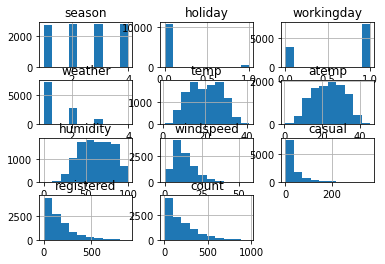

In [ ]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
train.hist()

In [ ]:
# create a new feature
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['weekday'] = train['datetime'].dt.weekday


test['year'] = test['datetime'].dt.year
test['month'] = test['datetime'].dt.month
test['day'] = test['datetime'].dt.day
test['hour'] = test['datetime'].dt.hour
test['weekday'] = test['datetime'].dt.weekday

train = train.drop('datetime', axis = 1)
train = train.drop(['casual','registered'], axis = 1)
test = test.drop('datetime', axis = 1)

## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [ ]:
train["season"] = train["season"].astype("category")
train["weather"] = train["weather"].astype("category")
test["season"] = test["season"].astype("category")
test["weather"] = test["weather"].astype("category")

In [ ]:
# View are new feature
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour,weekday
0,1,0,0,1,9.84,14.395,81,0.0,16,2011,1,1,0,5
1,1,0,0,1,9.02,13.635,80,0.0,40,2011,1,1,1,5
2,1,0,0,1,9.02,13.635,80,0.0,32,2011,1,1,2,5
3,1,0,0,1,9.84,14.395,75,0.0,13,2011,1,1,3,5
4,1,0,0,1,9.84,14.395,75,0.0,1,2011,1,1,4,5


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8725310550>,
      dtype=object)

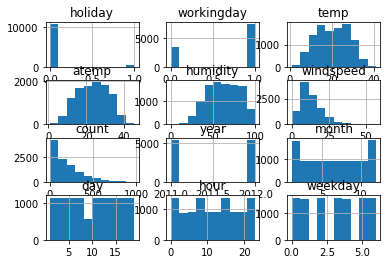

In [ ]:
# View histogram of all features again now with the hour feature
train.hist()

## Step 5: Rerun the model with the same settings as before, just with more features

In [ ]:
predictor_new_features = TabularPredictor(label='count', eval_metric=eval_metric).fit(train, presets='best_quality', time_limit=600)

No path specified. Models will be saved in: "AutogluonModels/ag-20210719_225128/"
Presets specified: ['best_quality']
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20210719_225128/"
AutoGluon Version:  0.2.0
Train Data Rows:    10886
Train Data Columns: 13
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    11084.2 MB
	Train Data (Original)  Memory Usage: 0.98 MB (0.0% of available memory)
	Inferring data type of each feature based on column v

[1000]	train_set's rmse: 45.5444	valid_set's rmse: 56.4784
[2000]	train_set's rmse: 37.0315	valid_set's rmse: 51.5302
[3000]	train_set's rmse: 32.0625	valid_set's rmse: 49.205
[4000]	train_set's rmse: 28.8208	valid_set's rmse: 48.104
[5000]	train_set's rmse: 26.4348	valid_set's rmse: 47.438
[6000]	train_set's rmse: 24.4342	valid_set's rmse: 46.9969
[7000]	train_set's rmse: 22.7785	valid_set's rmse: 46.7122
[8000]	train_set's rmse: 21.372	valid_set's rmse: 46.4372
[9000]	train_set's rmse: 20.1718	valid_set's rmse: 46.3246
[10000]	train_set's rmse: 19.0751	valid_set's rmse: 46.1492
[1000]	train_set's rmse: 45.8553	valid_set's rmse: 60.1311
[2000]	train_set's rmse: 37.127	valid_set's rmse: 54.4429
[3000]	train_set's rmse: 32.3178	valid_set's rmse: 51.9301
[4000]	train_set's rmse: 29.0672	valid_set's rmse: 50.5923
[5000]	train_set's rmse: 26.629	valid_set's rmse: 49.7932
[6000]	train_set's rmse: 24.6257	valid_set's rmse: 49.1691
[7000]	train_set's rmse: 22.9434	valid_set's rmse: 48.731
[80

	-47.3604	 = Validation root_mean_squared_error score
	112.45s	 = Training runtime
	8.0s	 = Validation runtime
Fitting model: LightGBM_BAG_L1 ... Training model for up to 261.64s of the 461.68s of remaining time.


[1000]	train_set's rmse: 19.8144	valid_set's rmse: 34.5176
[1000]	train_set's rmse: 19.846	valid_set's rmse: 34.427
[2000]	train_set's rmse: 14.3039	valid_set's rmse: 33.7285
[3000]	train_set's rmse: 11.2663	valid_set's rmse: 33.4853
[1000]	train_set's rmse: 19.8697	valid_set's rmse: 29.0867
[1000]	train_set's rmse: 19.766	valid_set's rmse: 36.3595
[2000]	train_set's rmse: 14.3417	valid_set's rmse: 35.4445
[3000]	train_set's rmse: 11.4008	valid_set's rmse: 35.0991
[4000]	train_set's rmse: 9.15962	valid_set's rmse: 34.9405
[5000]	train_set's rmse: 7.59445	valid_set's rmse: 34.8644
[6000]	train_set's rmse: 6.36802	valid_set's rmse: 34.8052
[1000]	train_set's rmse: 19.8315	valid_set's rmse: 36.0416
[2000]	train_set's rmse: 14.1709	valid_set's rmse: 35.4921
[1000]	train_set's rmse: 19.6911	valid_set's rmse: 36.9723
[2000]	train_set's rmse: 14.2916	valid_set's rmse: 36.4007
[1000]	train_set's rmse: 19.7018	valid_set's rmse: 32.2929
[1000]	train_set's rmse: 19.3621	valid_set's rmse: 33.113
[

	-34.1556	 = Validation root_mean_squared_error score
	27.73s	 = Training runtime
	1.43s	 = Validation runtime
Fitting model: RandomForestMSE_BAG_L1 ... Training model for up to 228.97s of the 429.01s of remaining time.
	-38.9104	 = Validation root_mean_squared_error score
	8.23s	 = Training runtime
	0.41s	 = Validation runtime
Fitting model: CatBoost_BAG_L1 ... Training model for up to 219.71s of the 419.75s of remaining time.
	Time limit exceeded... Skipping CatBoost_BAG_L1.
Fitting model: ExtraTreesMSE_BAG_L1 ... Training model for up to 173.66s of the 373.71s of remaining time.
	-38.6821	 = Validation root_mean_squared_error score
	3.92s	 = Training runtime
	0.4s	 = Validation runtime
Fitting model: NeuralNetFastAI_BAG_L1 ... Training model for up to 168.63s of the 368.67s of remaining time.
	-45.7375	 = Validation root_mean_squared_error score
	101.54s	 = Training runtime
	0.35s	 = Validation runtime
Fitting model: XGBoost_BAG_L1 ... Training model for up to 66.52s of the 266.57s 

In [ ]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -32.675883      16.517697  463.568234                0.001183           0.962074            3       True         19
1   NeuralNetFastAI_BAG_L2  -32.894638      11.663688  405.460183                0.383429          99.935153            2       True         17
2          CatBoost_BAG_L2  -33.066341      11.326211  341.150239                0.045952          35.625209            2       True         15
3      WeightedEnsemble_L2  -33.102508      10.874465  306.392960                0.001157           0.928287            2       True          9
4          LightGBM_BAG_L2  -33.333672      11.388388  311.668792                0.108128           6.143763            2       True         13
5     ExtraTreesMSE_BAG_L2  -33.369101      11.750766  312.152690         

{'leaderboard':                      model   score_val  ...  can_infer  fit_order
 0      WeightedEnsemble_L3  -32.675883  ...       True         19
 1   NeuralNetFastAI_BAG_L2  -32.894638  ...       True         17
 2          CatBoost_BAG_L2  -33.066341  ...       True         15
 3      WeightedEnsemble_L2  -33.102508  ...       True          9
 4          LightGBM_BAG_L2  -33.333672  ...       True         13
 5     ExtraTreesMSE_BAG_L2  -33.369101  ...       True         16
 6        LightGBMXT_BAG_L2  -33.648115  ...       True         12
 7           XGBoost_BAG_L2  -33.917404  ...       True         18
 8   RandomForestMSE_BAG_L2  -34.049430  ...       True         14
 9          LightGBM_BAG_L1  -34.155581  ...       True          4
 10   KNeighborsDist_BAG_L2  -35.081244  ...       True         11
 11   KNeighborsUnif_BAG_L2  -35.098836  ...       True         10
 12          XGBoost_BAG_L1  -35.269222  ...       True          8
 13    ExtraTreesMSE_BAG_L1  -38.682099  ...   

In [ ]:
# Remember to set all negative values to zero

predictions = predictor_new_features.predict(test)
predictions.head()


0    23.077486
1     6.238546
2     4.948815
3     4.301346
4     4.682296
Name: count, dtype: float32

In [ ]:
# How many negative values do we have?
count = 0
for row in predictions:
    if row < 0:
        count=count+1
        
print(count) 

5


In [ ]:
# Set them to zero
for i, row in enumerate(predictions):
    if row < 0:
            predictions[i] = 0
        
predictions.describe()    

count    6493.000000
mean      188.677383
std       170.447998
min         0.000000
25%        46.941528
50%       148.531662
75%       277.344360
max       883.355347
Name: count, dtype: float64

In [ ]:
# Same thing as train and test dataset
submission_new_features = pd.read_csv('sampleSubmission.csv', parse_dates = ['datetime'])
submission_new_features.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [ ]:
# Same submitting predictions
submission_new_features["count"] = predictions
submission_new_features.to_csv("submission_new_features.csv", index=False)

In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"

100% 188k/188k [00:02<00:00, 66.0kB/s]
Successfully submitted to Bike Sharing Demand

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission_new_features.csv  2021-07-19 23:03:28  new features                       complete  0.45526      0.45526       
submission.csv               2021-07-19 22:50:06  first raw submission               complete  1.36123      1.36123       
submission_new_hpo.csv       2021-07-19 22:01:47  new features with hyperparameters  complete  0.49144      0.49144       




```
# This is formatted as code
```

#### New Score of `0.45526`

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [ ]:
import autogluon.core as ag
#import autogluon.tabular.TabularPrediction
#import TabularPrediction as task

num_trials = 5  # try at most 5 different hyperparameter configurations for each type of model
search_strategy = 'auto' 

nn_options = {  # specifies non-default hyperparameter values for neural network models
    'num_epochs': 10,  # number of training epochs (controls training time of NN models)
    'learning_rate': ag.space.Real(1e-4, 1e-2, default=5e-4, log=True),  # learning rate used in training (real-valued hyperparameter searched on log-scale)
    'activation': ag.space.Categorical('relu', 'softrelu', 'tanh'),  # activation function used in NN (categorical hyperparameter, default = first entry)
    'layers': ag.space.Categorical([100], [1000], [200, 100], [300, 200, 100]),  # each choice for categorical hyperparameter 'layers' corresponds to list of sizes for each NN layer to use
    'dropout_prob': ag.space.Real(0.0, 0.5, default=0.1),  # dropout probability (real-valued hyperparameter)
}

gbm_options = {  # specifies non-default hyperparameter values for lightGBM gradient boosted trees
    'num_boost_round': 100,  # number of boosting rounds (controls training time of GBM models)
    'num_leaves': ag.space.Int(lower=26, upper=66, default=36),  # number of leaves in trees (integer hyperparameter)
}


hyperparameters = {  # hyperparameters of each model type
                   'GBM': gbm_options,
                   'NN': nn_options, 
                  } 

hyperparameter_tune_kwargs = {  # HPO is not performed unless hyperparameter_tune_kwargs is specified
    'num_trials': num_trials,
    'scheduler' : 'local',
    'searcher': search_strategy,
}                  


predictor_new_hpo = TabularPredictor(label='count', eval_metric=eval_metric).fit(train, presets='best_quality', time_limit=900, hyperparameters=hyperparameters, hyperparameter_tune_kwargs=hyperparameter_tune_kwargs)
#predictor_new_hpo = task.fit(train_data=train, label='count',
#                     time_limits=600, eval_metric=eval_metric, 
#                     hyperparameters=hyperparameters, hyperparameter_tune_kwargs=hyperparameter_tune_kwargs, 
#                     presets='best_quality')

No path specified. Models will be saved in: "AutogluonModels/ag-20210719_230458/"
Presets specified: ['best_quality']
Beginning AutoGluon training ... Time limit = 900s
AutoGluon will save models to "AutogluonModels/ag-20210719_230458/"
AutoGluon Version:  0.2.0
Train Data Rows:    10886
Train Data Columns: 13
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    11006.17 MB
	Train Data (Original)  Memory Usage: 0.98 MB (0.0% of available memory)
	Inferring data type of each feature based on column 

Fitted model: LightGBM_BAG_L1/T0 ...
	-41.553	 = Validation root_mean_squared_error score
	0.34s	 = Training runtime
	0.01s	 = Validation runtime
Fitted model: LightGBM_BAG_L1/T1 ...
	-39.3542	 = Validation root_mean_squared_error score
	0.32s	 = Training runtime
	0.01s	 = Validation runtime
Fitted model: LightGBM_BAG_L1/T2 ...
	-88.7428	 = Validation root_mean_squared_error score
	0.34s	 = Training runtime
	0.01s	 = Validation runtime
Fitted model: LightGBM_BAG_L1/T3 ...
	-42.8682	 = Validation root_mean_squared_error score
	0.33s	 = Training runtime
	0.01s	 = Validation runtime
Fitted model: LightGBM_BAG_L1/T4 ...
	-36.98	 = Validation root_mean_squared_error score
	0.32s	 = Training runtime


	0.01s	 = Validation runtime
Hyperparameter tuning model: NeuralNetMXNet_BAG_L1 ...


	Time limit exceeded
Fitted model: NeuralNetMXNet_BAG_L1/T0 ...
	-106.5495	 = Validation root_mean_squared_error score
	8.89s	 = Training runtime
	0.05s	 = Validation runtime
Fitted model: NeuralNetMXNet_BAG_L1/T1 ...
	-142.4644	 = Validation root_mean_squared_error score
	9.37s	 = Training runtime
	0.05s	 = Validation runtime
Fitting model: LightGBM_BAG_L1/T0 ... Training model for up to 576.15s of the 876.24s of remaining time.
	-41.8529	 = Validation root_mean_squared_error score
	3.04s	 = Training runtime
	0.12s	 = Validation runtime
Fitting model: LightGBM_BAG_L1/T1 ... Training model for up to 573.22s of the 873.31s of remaining time.
	-39.6103	 = Validation root_mean_squared_error score
	3.25s	 = Training runtime
	0.12s	 = Validation runtime
Fitting model: LightGBM_BAG_L1/T2 ... Training model for up to 570.02s of the 870.11s of remaining time.
	-89.6454	 = Validation root_mean_squared_error score
	3.34s	 = Training runtime
	0.11s	 = Validation runtime
Fitting model: LightGBM_BA

Fitted model: LightGBM_BAG_L2/T0 ...
	-38.2953	 = Validation root_mean_squared_error score
	0.38s	 = Training runtime
	0.01s	 = Validation runtime
Fitted model: LightGBM_BAG_L2/T1 ...
	-38.4982	 = Validation root_mean_squared_error score
	0.34s	 = Training runtime
	0.01s	 = Validation runtime
Fitted model: LightGBM_BAG_L2/T2 ...
	-61.2894	 = Validation root_mean_squared_error score
	0.36s	 = Training runtime
	0.01s	 = Validation runtime
Fitted model: LightGBM_BAG_L2/T3 ...
	-38.093	 = Validation root_mean_squared_error score
	0.38s	 = Training runtime
	0.01s	 = Validation runtime
Fitted model: LightGBM_BAG_L2/T4 ...
	-38.1882	 = Validation root_mean_squared_error score
	0.4s	 = Training runtime
	0.01s	 = Validation runtime
Hyperparameter tuning model: NeuralNetMXNet_BAG_L2 ...


	Time limit exceeded
Fitted model: NeuralNetMXNet_BAG_L2/T0 ...
	-48.5808	 = Validation root_mean_squared_error score
	8.94s	 = Training runtime
	0.06s	 = Validation runtime
Fitting model: LightGBM_BAG_L2/T0 ... Training model for up to 360.6s of the 360.59s of remaining time.
	-36.1134	 = Validation root_mean_squared_error score
	4.01s	 = Training runtime
	0.11s	 = Validation runtime
Fitting model: LightGBM_BAG_L2/T1 ... Training model for up to 356.74s of the 356.73s of remaining time.
	-36.3303	 = Validation root_mean_squared_error score
	3.67s	 = Training runtime
	0.09s	 = Validation runtime
Fitting model: LightGBM_BAG_L2/T2 ... Training model for up to 353.22s of the 353.21s of remaining time.
	-61.0764	 = Validation root_mean_squared_error score
	4.09s	 = Training runtime
	0.11s	 = Validation runtime
Fitting model: LightGBM_BAG_L2/T3 ... Training model for up to 349.25s of the 349.24s of remaining time.
	-36.056	 = Validation root_mean_squared_error score
	3.93s	 = Training runti

In [ ]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                       model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0        WeightedEnsemble_L3  -35.569491      20.080638  763.146419                0.001165           0.643980            3       True         15
1         LightGBM_BAG_L2/T4  -35.742808      13.489662  518.291558                0.270406          13.032085            2       True         13
2         LightGBM_BAG_L2/T1  -35.851343      13.494185  515.906070                0.274930          10.646597            2       True         10
3         LightGBM_BAG_L2/T0  -35.870060      13.535192  516.820716                0.315936          11.561243            2       True          9
4         LightGBM_BAG_L2/T3  -35.896424      13.566186  516.832324                0.346930          11.572851            2       True         12
5         LightGBM_BAG_L1/T4  -36.516072       0.363842   10.1

{'leaderboard':                        model   score_val  ...  can_infer  fit_order
 0        WeightedEnsemble_L3  -35.569491  ...       True         15
 1         LightGBM_BAG_L2/T4  -35.742808  ...       True         13
 2         LightGBM_BAG_L2/T1  -35.851343  ...       True         10
 3         LightGBM_BAG_L2/T0  -35.870060  ...       True          9
 4         LightGBM_BAG_L2/T3  -35.896424  ...       True         12
 5         LightGBM_BAG_L1/T4  -36.516072  ...       True          5
 6        WeightedEnsemble_L2  -36.516072  ...       True          8
 7         LightGBM_BAG_L1/T1  -39.112786  ...       True          2
 8         LightGBM_BAG_L1/T0  -41.474697  ...       True          1
 9         LightGBM_BAG_L1/T3  -42.719579  ...       True          4
 10  NeuralNetMXNet_BAG_L2/T0  -44.932684  ...       True         14
 11        LightGBM_BAG_L2/T2  -61.075778  ...       True         11
 12        LightGBM_BAG_L1/T2  -89.515268  ...       True          3
 13  NeuralNetMXNet

In [ ]:
predictions = predictor_new_hpo.predict(test)
predictions.head()

0    10.167534
1     6.550216
2     7.321984
3     6.716207
4     6.796607
Name: count, dtype: float32

In [ ]:
# Remember to set all negative values to zero
count = 0
for row in predictions:
    if row < 0:
        count=count+1
        
print(count)

0


In [ ]:
for i, row in enumerate(predictions):
    if row < 0:
            predictions[i] = 0
        
predictions.describe()

count    6493.000000
mean      190.026321
std       174.345932
min         5.490366
25%        44.373871
50%       147.392487
75%       282.658539
max       900.513245
Name: count, dtype: float64

In [ ]:
submission_new_hpo = pd.read_csv('sampleSubmission.csv', parse_dates = ['datetime'])
submission_new_hpo.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [ ]:
# Same submitting predictions
submission_new_hpo["count"] = predictions
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)

In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters"

100% 188k/188k [00:02<00:00, 67.1kB/s]
Successfully submitted to Bike Sharing Demand

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission_new_hpo.csv       2021-07-19 23:23:33  new features with hyperparameters  complete  0.47932      0.47932       
submission_new_features.csv  2021-07-19 23:03:28  new features                       complete  0.45526      0.45526       
submission.csv               2021-07-19 22:50:06  first raw submission               complete  1.36123      1.36123       


#### New Score of `0.47932`

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

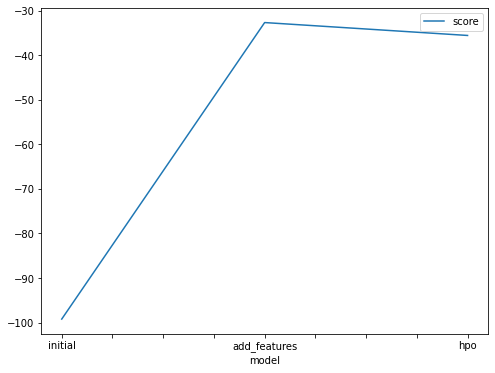

In [2]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": [-99.208281, -32.675883, -35.569491]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

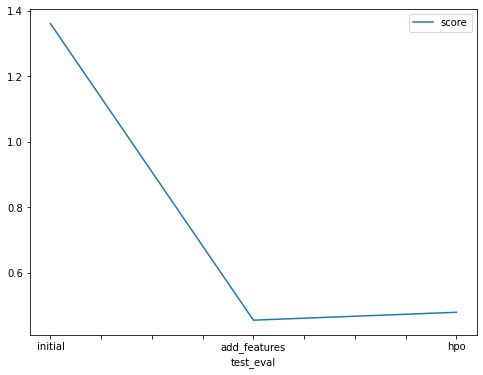

In [ ]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score": [1.36123, 0.45526, 0.47932]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

### Hyperparameter table

In [ ]:
# The 3 hyperparameters we tuned with the kaggle score as the result
pd.DataFrame({
    "model": ["initial", "add_features", "hpo"],
    "hpo1": ['default', 'default', 'GBM, NN'],
    "hpo2": ['default', 'default', 'GBM, NN'],
    "hpo3": ['default', 'default', 'GBM, NN'],
    "score": [1.36123, 0.45526, 0.47932]
})

,model,hpo1,hpo2,hpo3,score
0,initial,default,default,default,1.36123
1,add_features,default,default,default,0.45526
2,hpo,"GBM, NN","GBM, NN","GBM, NN",0.47932
